In [1]:
# Install Libraries
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.0 MB/s 
     |████████████████████████████████| 10.4 MB 6.0 MB/s 
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 3.3 MB 26.7 MB/s 
     |████████████████████████████████| 56 kB 2.2 MB/s 
     |████████████████████████████████| 167 kB 47.5 MB/s 
     |████████████████████████████████| 6.8 MB 16.9 MB/s 
     |████████████████████████████████| 134 kB 46.9 MB/s 
     |████████████████████████████████| 17.0 MB 131 kB/s 
     |████████████████████████████████| 262 kB 62.6 MB/s 
     |████████████████████████████████| 1.7 MB 49.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 49.5 MB/s 
     |████████████████████████████████| 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
# Make sure pycarete knows we are in colab
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab()>

In [3]:
#Load in the dataset
import pandas as pd
df=pd.read_csv(r'/content/HRDataset_v14.csv')

In [15]:
##Check for duplicated data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

In [16]:
##Check for overall null values in the dataset
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [37]:
import pandas as pd
data = df.dropna()
print(data)

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
4            Anderson, Carol   10069          0                2         0   
10       Baczenski, Rachael    10252          1                1         0   
11            Barbara, Thomas  10242          1                1         1   
..                        ...    ...        ...              ...       ...   
301             Wilber, Barry  10048          1                1         1   
302             Wilkes, Annie  10204          0                2         0   
303     Williams, Jacquelyn    10264          0                0         0   
304        Winthrop, Jordan    10033          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [38]:
#Split data into test and train data
data=df.sample(frac=0.95, random_state=786)
data_unseen=df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print("Data for Modeling:" +str (data.shape))
print("Unseen Data for Predictions:" + str (data_unseen.shape))

Data for Modeling:(295, 36)
Unseen Data for Predictions:(16, 36)


In [39]:
#Identify the total attrition percentage
data['Termd'].value_counts()/len(data)

0    0.674576
1    0.325424
Name: Termd, dtype: float64

In [41]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Ren, Kylo",10140,1,1,1,1,6,3,0,61809,...,John Smith,17.0,CareerBuilder,Fully Meets,3.98,3,0,1/28/2019,0,4
1,"England, Rex",10235,1,1,1,1,5,3,0,54285,...,Kelley Spirea,18.0,Employee Referral,Fully Meets,4.20,3,0,1/11/2019,0,3
2,"Jhaveri, Sneha",10060,0,3,0,1,5,3,0,60436,...,Kelley Spirea,18.0,LinkedIn,Fully Meets,5.00,5,0,1/21/2019,0,9
3,"Chigurh, Anton",10200,0,0,1,1,6,3,0,66808,...,Lynn Daneault,21.0,Employee Referral,Fully Meets,3.00,5,0,1/19/2019,0,17
4,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,2/18/2019,0,7


In [42]:
data.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
290,"Galia, Lisa",10273,0,0,0,1,3,3,0,65707,...,Eric Dougall,6.0,LinkedIn,Fully Meets,4.70,4,5,2/1/2019,0,1
291,"Clayton, Rick",10220,0,0,1,1,3,3,0,68678,...,Eric Dougall,6.0,Indeed,Fully Meets,4.70,3,6,2/27/2019,0,2
292,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/2015,0,13
293,"Roper, Katie",10086,0,0,0,1,3,3,0,150290,...,Brian Champaigne,13.0,Indeed,Fully Meets,4.94,3,5,2/6/2019,0,17
294,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7


In [44]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [47]:
##Drop column
drop_cols=['DateofTermination']
data.drop(drop_cols,inplace=True,axis=1)
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Ren, Kylo",10140,1,1,1,1,6,3,0,61809,...,John Smith,17.0,CareerBuilder,Fully Meets,3.98,3,0,1/28/2019,0,4
1,"England, Rex",10235,1,1,1,1,5,3,0,54285,...,Kelley Spirea,18.0,Employee Referral,Fully Meets,4.20,3,0,1/11/2019,0,3
2,"Jhaveri, Sneha",10060,0,3,0,1,5,3,0,60436,...,Kelley Spirea,18.0,LinkedIn,Fully Meets,5.00,5,0,1/21/2019,0,9
3,"Chigurh, Anton",10200,0,0,1,1,6,3,0,66808,...,Lynn Daneault,21.0,Employee Referral,Fully Meets,3.00,5,0,1/19/2019,0,17
4,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,2/18/2019,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,"Galia, Lisa",10273,0,0,0,1,3,3,0,65707,...,Eric Dougall,6.0,LinkedIn,Fully Meets,4.70,4,5,2/1/2019,0,1
291,"Clayton, Rick",10220,0,0,1,1,3,3,0,68678,...,Eric Dougall,6.0,Indeed,Fully Meets,4.70,3,6,2/27/2019,0,2
292,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.00,5,3,8/16/2015,0,13
293,"Roper, Katie",10086,0,0,0,1,3,3,0,150290,...,Brian Champaigne,13.0,Indeed,Fully Meets,4.94,3,5,2/6/2019,0,17


In [48]:
#Download Classification 
from pycaret.classification import *
exp_clf101= setup(data= data,target="Termd", session_id=123)

,Description,Value
0,session_id,123
1,Target,Termd
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(295, 35)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Termd',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [49]:
#Pick the best model to use
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.026
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.477
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.024
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.143
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.068
et,Extra Trees Classifier,0.9952,1.0000,0.9833,1.0000,0.9909,0.9877,0.9884,0.490
nb,Naive Bayes,0.9617,0.9500,0.8762,1.0000,0.9236,0.9007,0.9111,0.026
lda,Linear Discriminant Analysis,0.9074,0.9288,0.7286,0.9600,0.8233,0.7631,0.7802,0.076
lr,Logistic Regression,0.8931,0.8529,0.6500,0.9000,0.6981,0.6641,0.6956,0.435
ridge,Ridge Classifier,0.7186,0.0000,0.0810,0.3667,0.1266,0.0928,0.1356,0.025


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


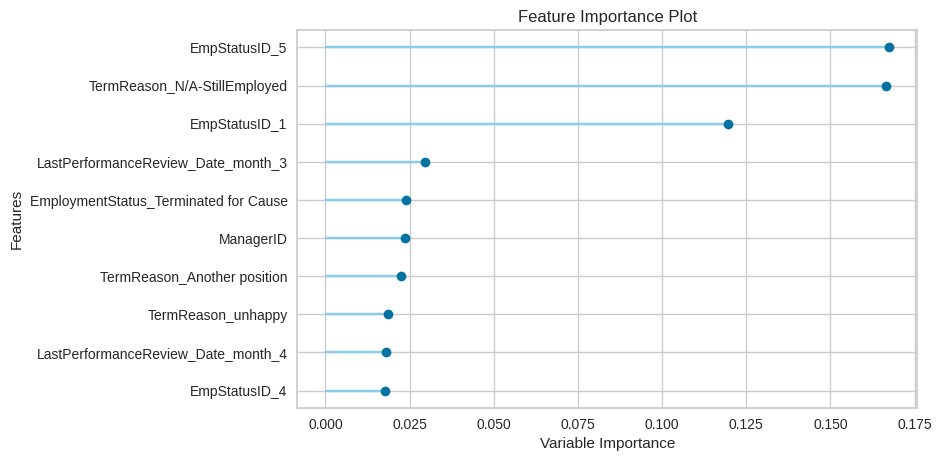

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
#Load model to see which features are most important
model=create_model('rf')
plot_model(model,plot='feature')

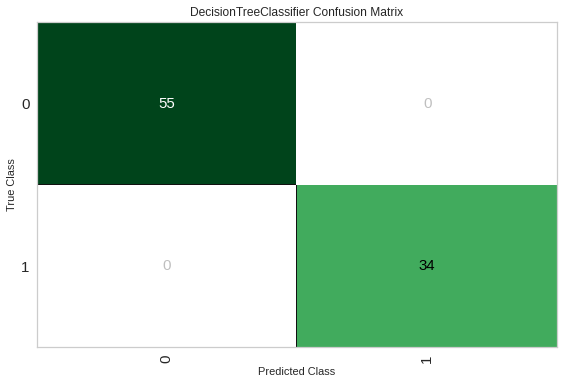

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [51]:
#See what we predicted wrong and right. Answers the question on are the effort to retain employees working?
plot_model(model,plot='confusion_matrix')

In [54]:
#Check if model worked well for unseen data
unseen_predictions= predict_model(model, data=data_unseen)
from pycaret.utils import check_metric
check_metric(unseen_predictions["Termd"], unseen_predictions['Label'], metric= "Accuracy")

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


1.0